https://timhutton.github.io/2010/03/10/30984.html

https://en.wikipedia.org/wiki/Langton%27s_loops

https://www.researchgate.net/publication/4249781_Sexyloop_Self-Reproduction_Evolution_and_Sex_in_Cellular_Automata

http://golly.sourceforge.net

http://neerc.ifmo.ru/wiki/index.php?title=Линейный_клеточный_автомат,_эквивалентность_МТ


https://en.wikipedia.org/wiki/Turmite

In [ ]:
using Pkg
pkgs = ["Images", "ColorSchemes"]

for p in pkgs
    Pkg.add(p)
end

using Images, ColorSchemes

┌ Info: Recompiling stale cache file C:\Users\User\.julia\compiled\v1.2\Images\H8Vxc.ji for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file C:\Users\User\.julia\compiled\v1.2\ImageMagick\0LbNX.ji for ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1240


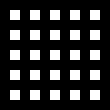

In [1]:
using Images
M = 10
N = 10
A = [ i&j&1 for i in 0:N, j in 0:M ] # isodd(i) & isodd(j) & 1
Gray.(A) # from Images.jl

In [75]:
using LinearAlgebra: kron, det

In [123]:
rule = 124
patrn = digits(Bool, rule, base = 2, pad = 8)

8-element Array{Bool,1}:
 0
 0
 1
 1
 1
 1
 1
 0

In [2]:
[ prod( string.( reverse( digits(i, base = 2, pad = 3) ) ) ) for i = 0:7 ]  

8-element Array{String,1}:
 "000"
 "001"
 "010"
 "011"
 "100"
 "101"
 "110"
 "111"

In [61]:
[ bitstring(i)[end-2:end] for i = 0:7 ]

8-element Array{String,1}:
 "000"
 "001"
 "010"
 "011"
 "100"
 "101"
 "110"
 "111"

In [124]:
d = Dict( bt[i] => patrn[i] for i = 1:8 )

Dict{String,Bool} with 8 entries:
  "000" => false
  "111" => false
  "001" => false
  "011" => true
  "101" => true
  "110" => true
  "010" => true
  "100" => true

In [125]:
d["001"]

false

In [194]:
using Random: bitrand

In [250]:
function cellauto( n::Int64, m::Int64, rule::Int64, s::Int64 = 1 )
    
    ptrn = digits(Bool, rule, base = 2, pad = 8)
    bt = [ bitstring(i)[end-2:end] for i = 0:7 ]
    d = Dict( bt[i] => ptrn[i] for i = 1:8 )
    
    M = falses(n,m)
    M[1,m ÷ 2] = true
    #M[1,:] .= bitrand(m)
    for i = 1:n-1, j = 2:m-1
        key = "$(M[i, j-1]*1)$(M[i, j]*1)$(M[i, j+1]*1)"
        M[i+1,j] = d[key]
    end
    kron(M, ones(Int,s,s) )
end

cellauto (generic function with 3 methods)

In [5]:
cd("C:\\Users\\User\\Desktop\\Mycop")

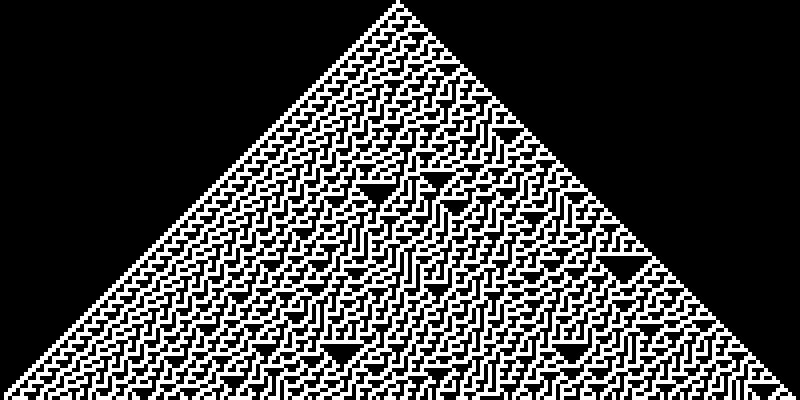

In [252]:
M0 = cellauto(100, 200, 73, 4)
Gray.( M0 )

,,,,,
,,,,,
,,,,,
,,,,,

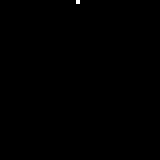
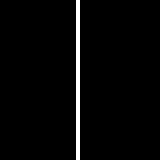
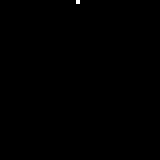
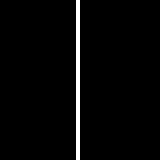
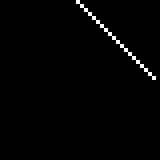
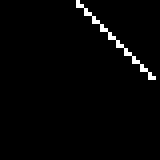
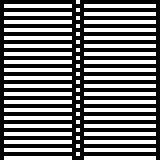
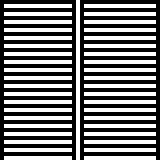
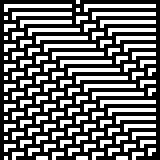
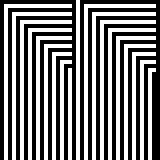
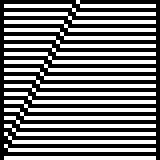
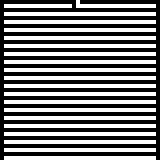
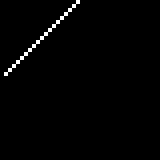
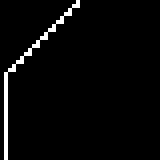
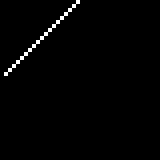
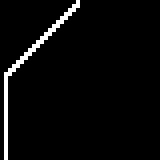
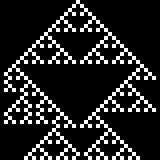
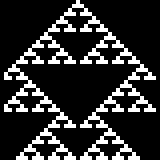
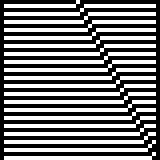
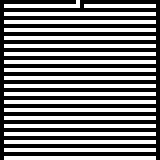
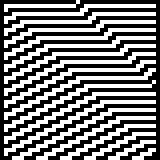
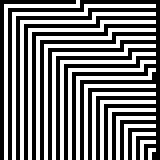
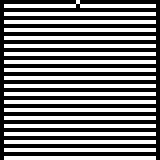
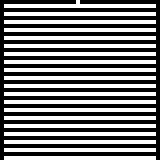

In [150]:
Arr = cellauto.(40, 40, [0:23;], 2);
Imgs = [ Gray.(a) for a in Arr ]
reshape(Imgs, 4,6)

,,,,,
,,,,,
,,,,,
,,,,,

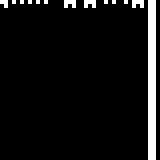
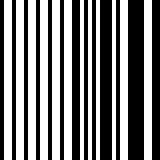
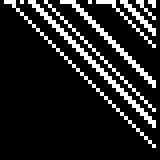
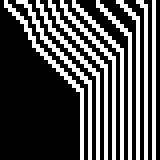
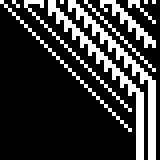
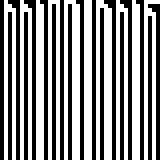
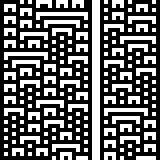
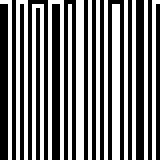
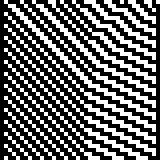
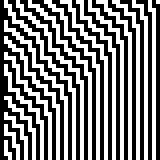
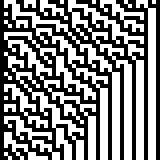
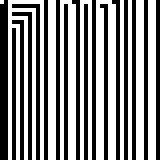
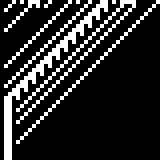
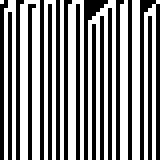
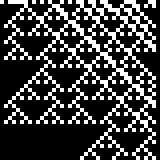
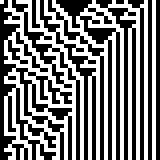
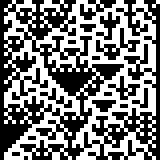
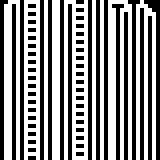
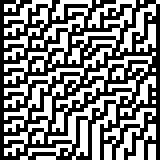
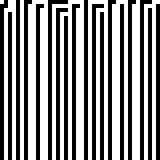
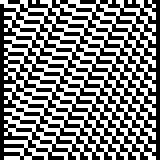
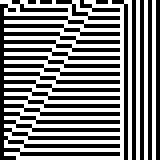
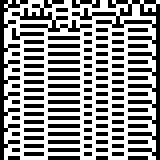
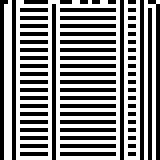

In [198]:
# random
Arr = cellauto.(40, 40, [72:95;], 2);
Imgs = [ Gray.(a) for a in Arr ]
reshape(Imgs, 4,6)

Цикличные граничные условия

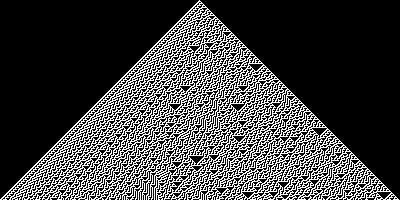

In [295]:
function cellauto( n::Int64, m::Int64, rule::Int64, s::Int64 = 1 )
    
    ptrn = digits(Bool, rule, base = 2, pad = 8)
    bt = [ bitstring(i)[end-2:end] for i = 0:7 ]
    d = Dict( bt[i] => ptrn[i] for i = 1:8 )
    
    M = falses(n,m)
    M[1,m ÷ 2] = true
    #M[1,:] .= bitrand(m)
    for i = 1:n-1
        M[i+1,1] = d["$(M[i, end]*1)$(M[i, 1]*1)$(M[i, 2]*1)"]
        M[i+1,end] = d["$(M[i, end-1]*1)$(M[i, end]*1)$(M[i, 1]*1)"]
        for j = 2:m-1
            key = "$(M[i, j-1]*1)$(M[i, j]*1)$(M[i, j+1]*1)"
            M[i+1,j] = d[key]
        end
    end
    M
end
M0 = cellauto(200, 400, 30, 4)
Gray.( M0 )

In [296]:
S = [ sum(M0[i,:]) for i=1:200 ] |> unique |> sort |> permutedims

1×134 Array{Int64,2}:
 1  3  4  5  6  7  9  11  12  13  14  …  199  201  204  206  210  212  214

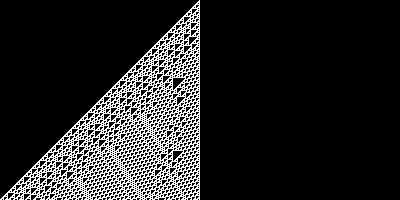

In [289]:
M0 = cellauto(200, 400, 110, 4)
Gray.( M0 )

In [293]:
S = [ sum(M0[i,:]) for i=1:200 ] |> unique |> sort |> permutedims

1×95 Array{Int64,2}:
 1  2  3  5  6  8  9  11  13  14  16  …  111  112  113  114  118  119  120

In [71]:
prod( string.( M0[6,90:100]*1 ) )

"00000101000"

In [ ]:
1, 6, 20, 120, 272, 1632, 5440, 32640 # rule 102

In [273]:
for i = 1:20
    s = prod( string.( M0[i,100-i:99+i]*1 ) )
    num = parse(Int, s, base = 2)
    println(num, ' ', s)
end

1 01
6 0110
20 010100
120 01111000
272 0100010000
1632 011001100000
5440 01010101000000
32640 0111111110000000
65792 010000000100000000
394752 01100000011000000000
1315840 0101000001010000000000
7895040 011110000111100000000000
17895424 01000100010001000000000000
107372544 0110011001100110000000000000
357908480 010101010101010100000000000000
2147450880 01111111111111111000000000000000
4295032832 0100000000000000010000000000000000
25770196992 011000000000000001100000000000000000
85900656640 01010000000000000101000000000000000000
515403939840 0111100000000000011110000000000000000000


https://cormullion.github.io/pub/2018-11-29-automata.html

In [4]:
readline() |> split |> unique |> length |> print

stdin> 1 1 1 2 2 3 3 
3